In [5]:
import configparser
from helpers.helper_functions import *
from helpers.helper_classes import *
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from matplotlib import pyplot as plt
import scienceplots
plt.style.use(['science', 'ieee']) 
plt.rcParams['figure.dpi'] = 100

# Read config.ini file
config = configparser.ConfigParser()
config.read('src/config.ini')

# Read dataframes from parquet
print('Loading data...')
df = pd.read_parquet(config['PATH']['DATA_DIR'] + '/training_set.parquet', engine = 'fastparquet')
df_test = pd.read_parquet(config['PATH']['DATA_DIR'] + '/test_set.parquet', engine = 'fastparquet')

# load wandb export from csv
wandb_export_load = pd.read_csv(config['PATH']['INT_DIR'] + '/wandb_export.csv')

Loading data...


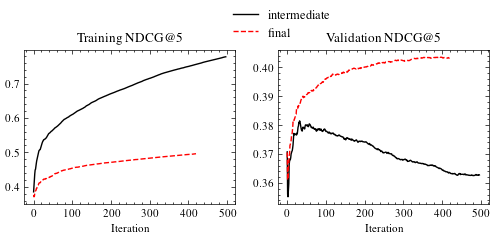

In [18]:
wandb_export = wandb_export_load.copy()

# drop step
wandb_export = wandb_export.drop(columns = ['Step'])

# drop all columns with suffix MIN or MAX
wandb_export = wandb_export[wandb_export.columns.drop(list(wandb_export.filter(regex='MIN')))]
wandb_export = wandb_export[wandb_export.columns.drop(list(wandb_export.filter(regex='MAX')))]

wandb_export

# plot 1x2 grid, plot training columns and validation columns
fig, ax = plt.subplots(1, 2, figsize = (6, 2))
train_cols = [col for col in wandb_export.columns if 'train' in col]
val_cols = [col for col in wandb_export.columns if 'val' in col]

# plot training columns
ax[0].plot(wandb_export.index, wandb_export[train_cols])
ax[0].set_title('Training NDCG@5')
ax[0].set_xlabel('Iteration')

ax[1].plot(wandb_export.index, wandb_export[val_cols])
ax[1].set_title('Validation NDCG@5')
ax[1].set_xlabel('Iteration')


# Legend
legend_names = ['intermediate', 'final']

# ax[0].legend(legend_names, loc = 'lower right', bbox_to_anchor = (1.5, 1))
# Legend with bigger fontsize
ax[0].legend(legend_names, loc = 'lower right', bbox_to_anchor = (1.5, 1), fontsize = 9)


# Save figure
fig.savefig(config['PATH']['FIGURE_DIR'] + '/training_curves.pdf', bbox_inches = 'tight')


In [30]:
# Load wandb_export_full from csv
wandb_full_load = pd.read_csv(config['PATH']['INT_DIR'] + '/wandb_export_full.csv')

In [31]:
wandb_full = wandb_full_load.copy()
wandb_full

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,boosting_type,colsample_bytree,...,min_samples_leaf,min_samples_split,n_neighbors,p,weights,iteration,ndcg,training_ndcg@5,valid_1_ndcg@5,ndcg_final
0,fragrant-blaze-487,finished,-,reiniervanelderen1,NaN,2023-05-22T19:31:36.000Z,123,NaN,gbdt,0.753639,...,NaN,NaN,NaN,NaN,NaN,497.0,NaN,0.777705,0.362770,0.381884
1,copper-durian-620,finished,-,reiniervanelderen1,NaN,2023-05-23T11:43:48.000Z,1556,NaN,dart,0.993218,...,NaN,NaN,NaN,NaN,NaN,750.0,NaN,0.766056,0.364400,0.384046
2,volcanic-sound-490,finished,-,reiniervanelderen1,NaN,2023-05-22T19:43:07.000Z,127,NaN,gbdt,0.732638,...,NaN,NaN,NaN,NaN,NaN,534.0,NaN,0.693072,0.371467,0.391098
3,misunderstood-silence-151,finished,-,rapsac,NaN,2023-05-19T16:42:33.000Z,182,NaN,gbdt,0.480885,...,NaN,NaN,NaN,NaN,NaN,519.0,NaN,0.375553,0.370780,0.391440
4,possibly-balanced-tiger-2,finished,Now with class_weight = balanced,rapsac,NaN,2023-05-20T09:49:21.000Z,230,NaN,gbdt,0.610146,...,NaN,NaN,NaN,NaN,NaN,655.0,NaN,0.470894,0.371681,0.391974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,sleek-jazz-614,failed,-,rapsac,NaN,2023-05-23T10:49:43.000Z,6,NaN,NaN,NaN,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,integrated-dinosaur-4,finished,Attempt 1 to replicate Reinier run,rapsac,NaN,2023-05-23T09:31:41.000Z,84,NaN,NaN,0.445129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,vibrant-dream-615,killed,-,rapsac,NaN,2023-05-23T10:51:44.000Z,3112,NaN,NaN,NaN,...,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,glowing-star-616,crashed,-,rapsac,NaN,2023-05-23T11:02:38.000Z,2765,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,uniform,NaN,NaN,NaN,NaN,NaN


c:\Users\caspa\Desktop\data-mining-techniques-vu\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Validation NDCG@5')

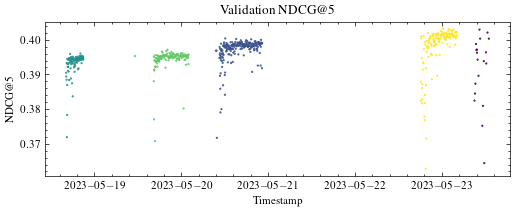

In [38]:
def datetime_to_float(d):
    return d.timestamp()

# 2023-05-22T19:31:36.000Z to timestamp
wandb_full['Created'] = pd.to_datetime(wandb_full['Created'])

# Classify points into groups based on Created timestamp using clustering
from sklearn.cluster import KMeans

# Create KMeans object
kmeans = KMeans(n_clusters = 5, random_state = 0)

# Fit KMeans object
wandb_full['Created_ts'] = wandb_full['Created'].apply(datetime_to_float)
kmeans.fit(wandb_full[['Created_ts']].values)

# Predict clusters
wandb_full['Cluster'] = kmeans.predict(wandb_full[['Created_ts']].values)




C:\Users\caspa\AppData\Local\Temp\ipykernel_8200\3196656185.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(cluster_names))
C:\Users\caspa\AppData\Local\Temp\ipykernel_8200\3196656185.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(wandb_full['Created'][mask], wandb_full['valid_1_ndcg@5'][mask], s = 0.6, c = cmap(i), label = cluster_names[i])
C:\Users\caspa\AppData\Local\Temp\ipykernel_8200\3196656185.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecate

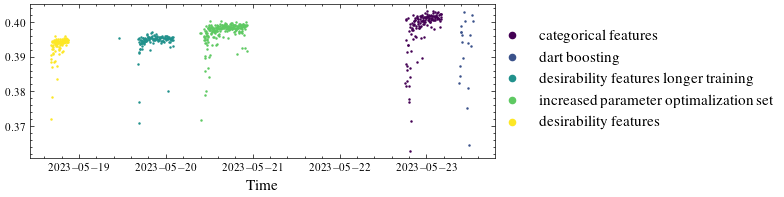

In [ ]:
# scatter plot created vs valid_1_ndcg@5
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

cluster_names = ['categorical features', 'dart boosting', 'desirability features longer training', 'increased parameter optimalization set', 'desirability features']

# Create a colormap
cmap = plt.cm.get_cmap('viridis', len(cluster_names))

fig, ax = plt.subplots(1, 1, figsize = (6, 2))

# Create a scatter plot for each cluster
for i, cluster in enumerate(wandb_full['Cluster'].unique()):
    mask = wandb_full['Cluster'] == cluster
    ax.scatter(wandb_full['Created'][mask], wandb_full['valid_1_ndcg@5'][mask], s = 0.6, c = cmap(i), label = cluster_names[i])

ax.set_xlabel('Time', fontsize = 11)
ax.set_ylabel('NDCG@5', fontsize = 11)

# Legend to the right of the plot
lgnd = ax.legend(loc = 'lower right', bbox_to_anchor = (1.63, 0.1), fontsize = 11)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.savefig(config['PATH']['FIGURE_DIR'] + '/validation_ndcg5_over_time.pdf', bbox_inches = 'tight')

